# Loading the dataset and Preprocessing it Part1

In [1]:
import pandas as pd

text_df=pd.read_csv("sentiment_newsarticles.csv")
text_df.loc[text_df.shape[0]] = ["News_12", None]
text_df.loc[text_df.shape[0]] = ["News_13", None]
text_df.loc[text_df.shape[0]] = ["News_14", None]
print(text_df.shape)
display(text_df.head(2))

for i in range(1,15):
    news_file=open("news_"+str(i)+".txt","r")
    news_text=""
    for line in news_file:
        line=line.strip()
        line=line.replace("\n","")+" "
        news_text+=line
    text_df.at[i-1,'text'] = news_text

print(text_df.shape)
display(text_df.head(4))

(14, 2)


,Article,Sentiment
0,News_1,neg
1,News_2,pos


(14, 3)


,Article,Sentiment,text
0,News_1,neg,Tesla: Elon Musk says company headquarters wil...
1,News_2,pos,Elon Musk brings Shiba Inu back to Earth - Dog...
2,News_3,pos,Elon Musk made $36 billion in a single day on ...
3,News_4,neg,Elon Musk's Tesla may be ready for a second in...


**Seperating the train and test data**

In [2]:
X_train = text_df["text"][:11]
X_test = text_df["text"][11:]
y_train = text_df["Sentiment"][:11]
y_test = text_df["Sentiment"][11:]

In [3]:
print("X_train: ", X_train.shape)
print("X_test:", X_test.shape)

X_train:  (11,)
X_test: (3,)


**Applying the Count Vectorizer**

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train =vectorizer.fit_transform(X_train).toarray()
X_test =vectorizer.transform(X_test).toarray()

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [23]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

X_train Shape:  (11, 2)
X_test Shape:  (3, 2)


**Applying the Naive Bayse**

In [7]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pre = GNB.predict(X_test)
print("Prediction: ", [le.classes_[i] for i in y_pre])

Prediction:  ['neg', 'neg', 'neg']


# Postive and negative txt files Part2

In [8]:
list_of_pos = []
file = open("positivewords.txt", "r")

for f in file.readlines():
    list_of_pos.append(f[:-1])
    
list_of_neg = []
file = open("negativewords.txt", "r")

for f in file.readlines():
    list_of_neg.append(f[:-1])

In [27]:
print("Positive words list:", list_of_pos)
print()
print("Negative words list:", list_of_neg)

Positive words list: ['powerhouse', 'fast', 'scalable', 'inexpensive', 'surge', 'ahead', 'wealth', 'surpassed', 'dominating', 'reusable', 'trillionaire', 'rally', 'richer', 'blasted', 'rose', 'billions', 'paid']

Negative words list: ['fallen', 'bubble', 'spat', 'jammed', 'costs', 'fell', 'mulling', 'u-turn', 'concerns', 'fledgling', 'feud', 'battle', 'problems', 'tiny', 'donation', 'challenging', 'halts', 'zero', 'cryptic', 'debate', 'drop', 'risky', 'risk', 'drop', 'tax', 'taxes', 'hoarding', 'sold', 'error', 'outage']


 **Frequency Distribution**

In [9]:
def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(list(zip(wordlist,wordfreq)))

wordFrequenciesPerArticle={}

for i in range(0,text_df.shape[0]):
    articleText=str(text_df.iloc[i]['text'].lower())
    articleWordListUnCleaned=articleText.split()
    articleWordListCleaned=[]
    for word in articleWordListUnCleaned:
        word=word.replace(":","")
        word=word.replace(".","")
        word=word.replace(",","")
        articleWordListCleaned.append(word)
    wordFrequenciesPerArticle[i]=wordListToFreqDict(articleWordListCleaned)
    #wordfreq=wordFrequenciesPerArticle[i]
print(wordFrequenciesPerArticle)

{0: {'tesla': 5, 'elon': 2, 'musk': 6, 'says': 1, 'company': 5, 'headquarters': 4, 'will': 3, 'move': 7, 'to': 13, 'texas': 7, 'has': 4, 'announced': 3, 'it': 3, 'its': 6, 'from': 7, 'california': 9, 'chief': 1, 'executive': 1, 'the': 12, 'at': 3, 'electric': 1, "carmaker's": 1, 'annual': 1, "shareholders'": 1, 'meeting': 1, 'in': 9, 'austin': 3, 'mr': 3, 'had': 4, 'fallen': 1, 'out': 1, 'with': 3, 'local': 2, 'politicians': 2, 'alameda': 1, 'county': 1, 'location': 1, 'of': 5, 'a': 6, 'key': 1, 'factory': 3, 'over': 1, 'covid': 1, 'response': 1, 'he': 6, 'gave': 1, 'several': 1, 'reasons': 1, 'for': 3, 'telling': 1, 'shareholders': 2, 'californian': 1, 'fremont': 2, 'was': 4, '"jammed"': 1, 'also': 3, 'difficult': 1, 'place': 1, 'his': 3, 'employees': 1, 'find': 1, 'affordable': 1, 'housing': 1, 'told': 1, '"there\'s': 1, 'limit': 1, 'how': 1, 'big': 1, 'you': 1, 'can': 1, 'scale': 1, 'bay': 1, 'area': 1, 'our': 1, 'is': 4, 'like': 1, 'five': 1, 'minutes': 2, 'airport': 1, '15': 1, 'd

**Postive words proporation for each artical**

In [10]:
pos_proportions = []
for i in range(14):
    proportion_p=len(list_of_pos) / len(list(wordFrequenciesPerArticle[i].keys()))
    print("Positive proportion of file ", i + 1, ": ", proportion_p)
    pos_proportions.append(proportion_p)

Positive proportion of file  1 :  0.09714285714285714
Positive proportion of file  2 :  0.12318840579710146
Positive proportion of file  3 :  0.14166666666666666
Positive proportion of file  4 :  0.1588785046728972
Positive proportion of file  5 :  0.15178571428571427
Positive proportion of file  6 :  0.14655172413793102
Positive proportion of file  7 :  0.11971830985915492
Positive proportion of file  8 :  0.1588785046728972
Positive proportion of file  9 :  0.11258278145695365
Positive proportion of file  10 :  0.11333333333333333
Positive proportion of file  11 :  0.09340659340659341
Positive proportion of file  12 :  0.07727272727272727
Positive proportion of file  13 :  0.12878787878787878
Positive proportion of file  14 :  0.12878787878787878


**negative words proporation for each word in artical**

In [11]:
neg_proportions = []
for i in range(14):
    proportion_n = len(list_of_neg) / len(list(wordFrequenciesPerArticle[i].keys()))
    print("negative proportion of file ", i + 1, ": ", proportion_n)
    neg_proportions.append(proportion_n)

negative proportion of file  1 :  0.17142857142857143
negative proportion of file  2 :  0.21739130434782608
negative proportion of file  3 :  0.25
negative proportion of file  4 :  0.2803738317757009
negative proportion of file  5 :  0.26785714285714285
negative proportion of file  6 :  0.25862068965517243
negative proportion of file  7 :  0.2112676056338028
negative proportion of file  8 :  0.2803738317757009
negative proportion of file  9 :  0.1986754966887417
negative proportion of file  10 :  0.2
negative proportion of file  11 :  0.16483516483516483
negative proportion of file  12 :  0.13636363636363635
negative proportion of file  13 :  0.22727272727272727
negative proportion of file  14 :  0.22727272727272727


In [12]:
import pandas as pd
data=pd.read_csv("Tesla_KPI.csv")
ROE = data["ROE"].values.tolist()
NPM = data["NPM"].values.tolist()

**calculate performance on the basis of Return Equity ,Net Profit Margin**

In [13]:
performance = []
for roe, npm, pos, neg in zip(ROE, NPM, pos_proportions, neg_proportions):
    if (roe>0.6 and npm>0.4)or roe>0.8:
        performance.append('good')
    elif (roe<=0.6 and npm<=0.4)or roe<0.2:
        performance.append('bad')
    else:
        performance.append('Invalid value')  
print(performance)

['bad', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'bad', 'bad']


**Create dafa frame of features and lables**

In [15]:
# import pandas library as pd
import pandas as pd
  
# create an Empty DataFrame object
df = pd.DataFrame()
  
# append columns to an empty DataFrame
df['pos_pro'] = pos_proportions
df['neg_pro'] = neg_proportions
df['performance'] = performance
df

,pos_pro,neg_pro,performance
0,0.097143,0.171429,bad
1,0.123188,0.217391,good
2,0.141667,0.250000,good
3,0.158879,0.280374,bad
4,0.151786,0.267857,good
5,0.146552,0.258621,bad
6,0.119718,0.211268,bad
7,0.158879,0.280374,bad
8,0.112583,0.198675,good
9,0.113333,0.200000,good


**Train Test Split**

In [28]:
X=df.iloc[:,:-1]
X_train = X.iloc[:11]
X_test = X.iloc[11:]

Y=df.iloc[:,-1]
y_train=Y.iloc[:11]
y_test=Y.iloc[11:]

print("X_Train: ", X_train.shape)
print("X_Test: ", X_test.shape)

X_Train:  (11, 2)
X_Test:  (3, 2)


**Logistic Regression**

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred

array(['good', 'good', 'good'], dtype=object)

**logistic regression for feature importance**

Feature: 0, Score: -0.03680
Feature: 1, Score: -0.06494


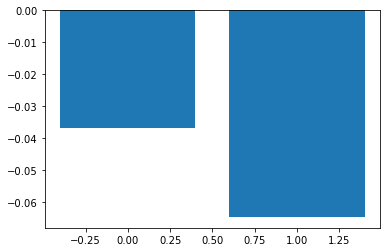

In [18]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
model = LogisticRegression()
model.fit(X_train,y_train)
importance = model.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

**Random Forest**

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
clf = RandomForestClassifier(random_state=0)

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(y_pred)

['good' 'good' 'good']


**Random forest for feature importance on a classification problem**

Feature: 0, Score: 0.50363
Feature: 1, Score: 0.49637


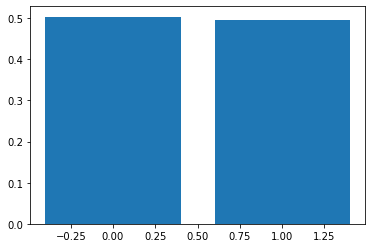

In [20]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
model = RandomForestClassifier()
model.fit(X_train, y_train)
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()